In [1]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 설정 (Matplotlib에서 한글 깨짐 방지)
import matplotlib.pyplot as plt

plt.rc("font", family="NanumGothic")  # Windows 사용자의 경우

# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

# 기본 라이브러리
import polars as pl
import pandas as pd
import seaborn as sns
import numpy as np

# 시각화용 색상 팔레트
color_palette = sns.color_palette("Set2", as_cmap=False)

In [3]:
상품집계_고객집계 = pl.read_csv('./dataset/상품집계_고객집계.csv')

In [4]:
상품집계_고객집계.head()

고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출금액,거래기간(개월),평균_총점수,최대_보유상품종류,평균_보유상품종류,연령대,최대_고객등급,KMeans_DB_KneeLocato_2030,중분류
i64,f64,f64,f64,f64,f64,i64,f64,i64,i64,i64,str,i64,str
2065204669,0.0,0.0,0.0,0.0,1.85e6,2,210.116667,1,1,30,"""일반등급""",0,"""A"""
4070774528,722580.645161,1.3355e6,0.0,1.0152e6,0.0,36,330.565591,3,2,20,"""일반등급""",0,"""A"""
4720215619,190322.580645,6451.612903,0.0,0.0,0.0,36,41.44086,2,1,30,"""일반등급""",0,"""A"""
4139190886,7.8290e6,0.0,0.0,6129.032258,0.0,36,655.55914,2,1,20,"""일반등급""",6,"""C"""
2243610603,200000.0,0.0,0.0,10000.0,5.65e6,6,1487.988889,3,2,20,"""일반등급""",0,"""A"""


In [5]:
상품_컬럼 = [
    "평균_입출금예금", "평균_기타예금", "평균_비이자상품",
    "평균_카드", "평균_대출금액"
]

In [6]:
df = 상품집계_고객집계.clone()

상품_컬럼 = [
    "평균_입출금예금", "평균_기타예금", "평균_비이자상품",
    "평균_카드", "평균_대출금액"
]

# 1️. 상품 보유 여부 0/1 처리
df_bin = df.with_columns([
    pl.col(col).gt(0).cast(pl.Int8).alias(col) for col in 상품_컬럼
])

In [7]:
df_bin

고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출금액,거래기간(개월),평균_총점수,최대_보유상품종류,평균_보유상품종류,연령대,최대_고객등급,KMeans_DB_KneeLocato_2030,중분류
i64,i8,i8,i8,i8,i8,i64,f64,i64,i64,i64,str,i64,str
2065204669,0,0,0,0,1,2,210.116667,1,1,30,"""일반등급""",0,"""A"""
4070774528,1,1,0,1,0,36,330.565591,3,2,20,"""일반등급""",0,"""A"""
4720215619,1,1,0,0,0,36,41.44086,2,1,30,"""일반등급""",0,"""A"""
4139190886,1,0,0,1,0,36,655.55914,2,1,20,"""일반등급""",6,"""C"""
2243610603,1,0,0,1,1,6,1487.988889,3,2,20,"""일반등급""",0,"""A"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…
4412204367,1,0,0,1,0,36,132.941935,2,2,20,"""일반등급""",0,"""A"""
3925855257,1,0,0,0,0,36,19.333333,1,0,30,"""일반등급""",0,"""A"""
6829335805,1,0,0,0,0,36,166.580645,1,1,30,"""일반등급""",0,"""A"""


In [8]:
def groupby_split_apply_concat_with_cluster(df: pl.DataFrame, 
                                            group_col: str, 
                                            agg_cols: list[str], 
                                            cluster_col: str,
                                            agg_func: str = "max",
                                            chunk_size: int = 100_000) -> pl.DataFrame:
    """
    대용량 데이터에서 groupby + agg 계산을 고객ID 단위로 나눠서 처리하고,
    클러스터 컬럼도 함께 병합해서 반환

    Parameters
    ----------
    df : pl.DataFrame
    group_col : str
    agg_cols : list[str]
    cluster_col : str
    agg_func : str
    chunk_size : int

    Returns
    -------
    pl.DataFrame
    """
    unique_ids = df.select(group_col).unique().to_series().to_list()
    chunks = [unique_ids[i:i + chunk_size] for i in range(0, len(unique_ids), chunk_size)]
    results = []

    for i, chunk_ids in enumerate(chunks):
        print(f"▶️ {i+1}/{len(chunks)} chunk 처리 중... (고객 {len(chunk_ids)}명)")

        df_chunk = df.filter(pl.col(group_col).is_in(chunk_ids))

        # 집계
        if agg_func == "max":
            result = df_chunk.group_by(group_col).agg([
                *[pl.col(col).max().alias(col) for col in agg_cols]
            ])
        else:
            raise ValueError("현재는 'max'만 지원됩니다.")

        # 클러스터 정보는 첫 번째 값으로 취득 (고객 단위로 고정값이기 때문에)
        cluster_info = df_chunk.select([pl.col(group_col), pl.col(cluster_col)])

        # 병합
        result = result.join(cluster_info, on=group_col, how="left")
        results.append(result)

    return pl.concat(results)


In [9]:
상품_컬럼 = [
    "평균_입출금예금", "평균_기타예금", "평균_비이자상품",
    "평균_카드", "평균_대출금액"
]
agg_cols = 상품_컬럼  # 원하는 수치형 컬럼
grouped_df = groupby_split_apply_concat_with_cluster(
    df=df_bin,
    group_col="고객ID",
    agg_cols=agg_cols,
    cluster_col="중분류"
)

▶️ 1/6 chunk 처리 중... (고객 100000명)
▶️ 2/6 chunk 처리 중... (고객 100000명)
▶️ 3/6 chunk 처리 중... (고객 100000명)
▶️ 4/6 chunk 처리 중... (고객 100000명)
▶️ 5/6 chunk 처리 중... (고객 100000명)
▶️ 6/6 chunk 처리 중... (고객 99499명)


In [10]:
grouped_df

고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출금액,중분류
i64,i8,i8,i8,i8,i8,str
2476097505,1,0,0,0,0,"""A"""
4131619203,1,1,0,1,0,"""A"""
3766106230,1,0,0,1,0,"""A"""
4989027229,1,0,0,0,0,"""A"""
4047867631,1,1,0,1,0,"""C"""
…,…,…,…,…,…,…
2912430938,0,0,0,0,1,"""B"""
5380664771,1,0,0,1,0,"""A"""
2753723541,0,0,0,0,1,"""B"""


In [11]:
cluster_a_상품집계 = grouped_df.filter(pl.col("중분류") == "A").clone()
cluster_b_상품집계 = grouped_df.filter(pl.col("중분류") == "B").clone()
cluster_c_상품집계 = grouped_df.filter(pl.col("중분류") == "C").clone()
cluster_d_상품집계 = grouped_df.filter(pl.col("중분류") == "D").clone()

In [12]:
# 3. 상품 상태 컬럼 생성
def add_product_status_columns(cluster_df, product_cols):
    df = cluster_df.to_pandas().copy()
    for col in product_cols:
        df[col + "_상태"] = df[col].apply(lambda x: f"{col}-O" if x > 0 else f"{col}-X")
    return df

In [13]:
# 클러스터들을 리스트로 모아 반복 처리
cluster_dfs = [cluster_a_상품집계, cluster_b_상품집계, cluster_c_상품집계, cluster_d_상품집계]
cluster_dfs_status = []

for cluster in cluster_dfs:
    cluster_status = add_product_status_columns(cluster, 상품_컬럼)
    cluster_dfs_status.append(cluster_status)

In [14]:
cluster_a_상품집계_상품상태 = cluster_dfs_status[0]
cluster_b_상품집계_상품상태 = cluster_dfs_status[1]
cluster_c_상품집계_상품상태 = cluster_dfs_status[2]
cluster_d_상품집계_상품상태 = cluster_dfs_status[3]

In [15]:
cluster_a_상품집계_상품상태.head()

,고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출금액,중분류,평균_입출금예금_상태,평균_기타예금_상태,평균_비이자상품_상태,평균_카드_상태,평균_대출금액_상태
0,2476097505,1,0,0,0,0,A,평균_입출금예금-O,평균_기타예금-X,평균_비이자상품-X,평균_카드-X,평균_대출금액-X
1,4131619203,1,1,0,1,0,A,평균_입출금예금-O,평균_기타예금-O,평균_비이자상품-X,평균_카드-O,평균_대출금액-X
2,3766106230,1,0,0,1,0,A,평균_입출금예금-O,평균_기타예금-X,평균_비이자상품-X,평균_카드-O,평균_대출금액-X
3,4989027229,1,0,0,0,0,A,평균_입출금예금-O,평균_기타예금-X,평균_비이자상품-X,평균_카드-X,평균_대출금액-X
4,2983883259,0,0,0,0,1,A,평균_입출금예금-X,평균_기타예금-X,평균_비이자상품-X,평균_카드-X,평균_대출금액-O


In [17]:
print(cluster_a_상품집계_상품상태.shape[0])
print(cluster_b_상품집계_상품상태.shape[0])
print(cluster_c_상품집계_상품상태.shape[0])
print(cluster_d_상품집계_상품상태.shape[0])

484649
35471
70620
8759


In [22]:
def create_product_combination_polars_from_pandas(pandas_df: pd.DataFrame, product_cols, chunk_size: int = 200000):
    import pandas as pd
    import polars as pl
    from tqdm import tqdm
    import time

    start_time = time.time()
    
    # 1. pandas → polars 변환
    status_cols = [col + "_상태" for col in product_cols]
    pl_df = pl.from_pandas(pandas_df)  # ✅ 변환 필요
    
    total_rows = pl_df.height  # 이제 height 사용 가능
    total_chunks = (total_rows - 1) // chunk_size + 1
    print(f"전체 행 수: {total_rows} | 청크 크기: {chunk_size} → 총 {total_chunks}개 청크")

    # 2. 청크 단위로 처리하며 진행률 표시
    chunks = []
    for i in tqdm(range(0, total_rows, chunk_size), desc="상품조합 생성 중"):
        chunk = pl_df.slice(i, chunk_size)
        chunk = chunk.with_columns([
            pl.concat_str([pl.col(col) for col in status_cols], separator="_").alias("상품조합")
        ])
        chunks.append(chunk)

    # 3. 청크 합치기
    result = pl.concat(chunks)
    
    elapsed_time = time.time() - start_time
    print(f"[상품조합 생성 완료] 총 처리 시간: {elapsed_time:.2f}초")

    return result  # ✅ Polars DataFrame 리턴


In [23]:
cluster_a_pl = create_product_combination_polars_from_pandas(cluster_a_상품집계_상품상태, 상품_컬럼, chunk_size=10000)

전체 행 수: 484649 | 청크 크기: 10000 → 총 49개 청크


상품조합 생성 중: 100%|███████████████████████| 49/49 [00:00<00:00, 811.17it/s]

[상품조합 생성 완료] 총 처리 시간: 0.35초


In [24]:
cluster_b_pl = create_product_combination_polars_from_pandas(cluster_b_상품집계_상품상태, 상품_컬럼, chunk_size=10000)

전체 행 수: 35471 | 청크 크기: 10000 → 총 4개 청크


상품조합 생성 중: 100%|█████████████████████████| 4/4 [00:00<00:00, 383.14it/s]

[상품조합 생성 완료] 총 처리 시간: 0.03초


In [25]:
cluster_c_pl = create_product_combination_polars_from_pandas(cluster_c_상품집계_상품상태, 상품_컬럼, chunk_size=10000)

전체 행 수: 70620 | 청크 크기: 10000 → 총 8개 청크


상품조합 생성 중: 100%|████████████████████████| 8/8 [00:00<00:00, 3111.50it/s]

[상품조합 생성 완료] 총 처리 시간: 0.04초


In [26]:
cluster_d_pl = create_product_combination_polars_from_pandas(cluster_d_상품집계_상품상태, 상품_컬럼, chunk_size=10000)

전체 행 수: 8759 | 청크 크기: 10000 → 총 1개 청크


상품조합 생성 중: 100%|█████████████████████████| 1/1 [00:00<00:00, 498.91it/s]

[상품조합 생성 완료] 총 처리 시간: 0.01초


In [27]:
cluster_a_pl.head()

고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출금액,중분류,평균_입출금예금_상태,평균_기타예금_상태,평균_비이자상품_상태,평균_카드_상태,평균_대출금액_상태,상품조합
i64,i8,i8,i8,i8,i8,str,str,str,str,str,str,str
2476097505,1,0,0,0,0,"""A""","""평균_입출금예금-O""","""평균_기타예금-X""","""평균_비이자상품-X""","""평균_카드-X""","""평균_대출금액-X""","""평균_입출금예금-O_평균_기타예금-X_평균_비이자상품-…"
4131619203,1,1,0,1,0,"""A""","""평균_입출금예금-O""","""평균_기타예금-O""","""평균_비이자상품-X""","""평균_카드-O""","""평균_대출금액-X""","""평균_입출금예금-O_평균_기타예금-O_평균_비이자상품-…"
3766106230,1,0,0,1,0,"""A""","""평균_입출금예금-O""","""평균_기타예금-X""","""평균_비이자상품-X""","""평균_카드-O""","""평균_대출금액-X""","""평균_입출금예금-O_평균_기타예금-X_평균_비이자상품-…"
4989027229,1,0,0,0,0,"""A""","""평균_입출금예금-O""","""평균_기타예금-X""","""평균_비이자상품-X""","""평균_카드-X""","""평균_대출금액-X""","""평균_입출금예금-O_평균_기타예금-X_평균_비이자상품-…"
2983883259,0,0,0,0,1,"""A""","""평균_입출금예금-X""","""평균_기타예금-X""","""평균_비이자상품-X""","""평균_카드-X""","""평균_대출금액-O""","""평균_입출금예금-X_평균_기타예금-X_평균_비이자상품-…"


In [28]:
# 6. 조합별 고객 수 확인
combo_summary_cluster_a = (cluster_a_pl.group_by("상품조합").count().rename({"count": "고객수"}).sort("고객수", descending=True))
combo_summary_cluster_b = (cluster_b_pl.group_by("상품조합").count().rename({"count": "고객수"}).sort("고객수", descending=True))
combo_summary_cluster_c = (cluster_c_pl.group_by("상품조합").count().rename({"count": "고객수"}).sort("고객수", descending=True))
combo_summary_cluster_d = (cluster_d_pl.group_by("상품조합").count().rename({"count": "고객수"}).sort("고객수", descending=True))

In [29]:
combo_summary_cluster_a.head(10)

상품조합,고객수
str,u32
"""평균_입출금예금-O_평균_기타예금-X_평균_비이자상품-…",126343
"""평균_입출금예금-O_평균_기타예금-X_평균_비이자상품-…",93658
"""평균_입출금예금-X_평균_기타예금-X_평균_비이자상품-…",63599
"""평균_입출금예금-O_평균_기타예금-X_평균_비이자상품-…",62333
"""평균_입출금예금-O_평균_기타예금-O_평균_비이자상품-…",45650
"""평균_입출금예금-O_평균_기타예금-O_평균_비이자상품-…",29383
"""평균_입출금예금-X_평균_기타예금-O_평균_비이자상품-…",19238
"""평균_입출금예금-X_평균_기타예금-X_평균_비이자상품-…",18129
"""평균_입출금예금-O_평균_기타예금-X_평균_비이자상품-…",10536


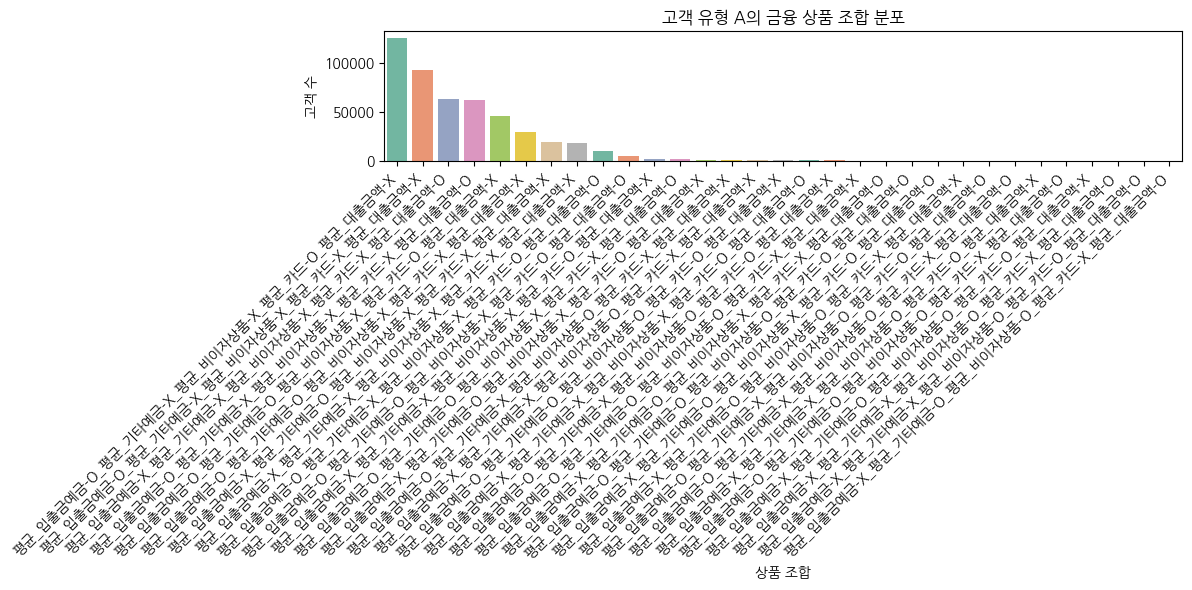

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(data=combo_summary_cluster_a, x="상품조합", y="고객수", palette="Set2")
plt.title("고객 유형 A의 금융 상품 조합 분포")
plt.xlabel("상품 조합")
plt.ylabel("고객 수")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 클러스터별 상위 6개 조합 가져오기

In [32]:
top_n = 6

In [33]:
top_combos_0 = combo_summary_cluster_a.head(top_n)
top_combos_1 = combo_summary_cluster_b.head(top_n)
top_combos_2 = combo_summary_cluster_c.head(top_n)
top_combos_3 = combo_summary_cluster_d.head(top_n)

In [34]:
# 조합을 간단하게 표현하는 함수
def simplify_combo(combo_str):
    parts = [p.replace("-O", "") for p in combo_str.split("_") if "-O" in p]
    return "+".join(parts) if parts else "없음"

In [35]:
top_combos_0 = top_combos_0.with_columns(pl.col("상품조합").map_elements(simplify_combo).alias("간단조합"))
top_combos_1 = top_combos_1.with_columns(pl.col("상품조합").map_elements(simplify_combo).alias("간단조합"))
top_combos_2 = top_combos_2.with_columns(pl.col("상품조합").map_elements(simplify_combo).alias("간단조합"))
top_combos_3 = top_combos_3.with_columns(pl.col("상품조합").map_elements(simplify_combo).alias("간단조합"))


In [36]:
top_combos_0

상품조합,고객수,간단조합
str,u32,str
"""평균_입출금예금-O_평균_기타예금-X_평균_비이자상품-…",126343,"""입출금예금+카드"""
"""평균_입출금예금-O_평균_기타예금-X_평균_비이자상품-…",93658,"""입출금예금"""
"""평균_입출금예금-X_평균_기타예금-X_평균_비이자상품-…",63599,"""대출금액"""
"""평균_입출금예금-O_평균_기타예금-X_평균_비이자상품-…",62333,"""입출금예금+대출금액"""
"""평균_입출금예금-O_평균_기타예금-O_평균_비이자상품-…",45650,"""입출금예금+기타예금+카드"""
"""평균_입출금예금-O_평균_기타예금-O_평균_비이자상품-…",29383,"""입출금예금+기타예금"""


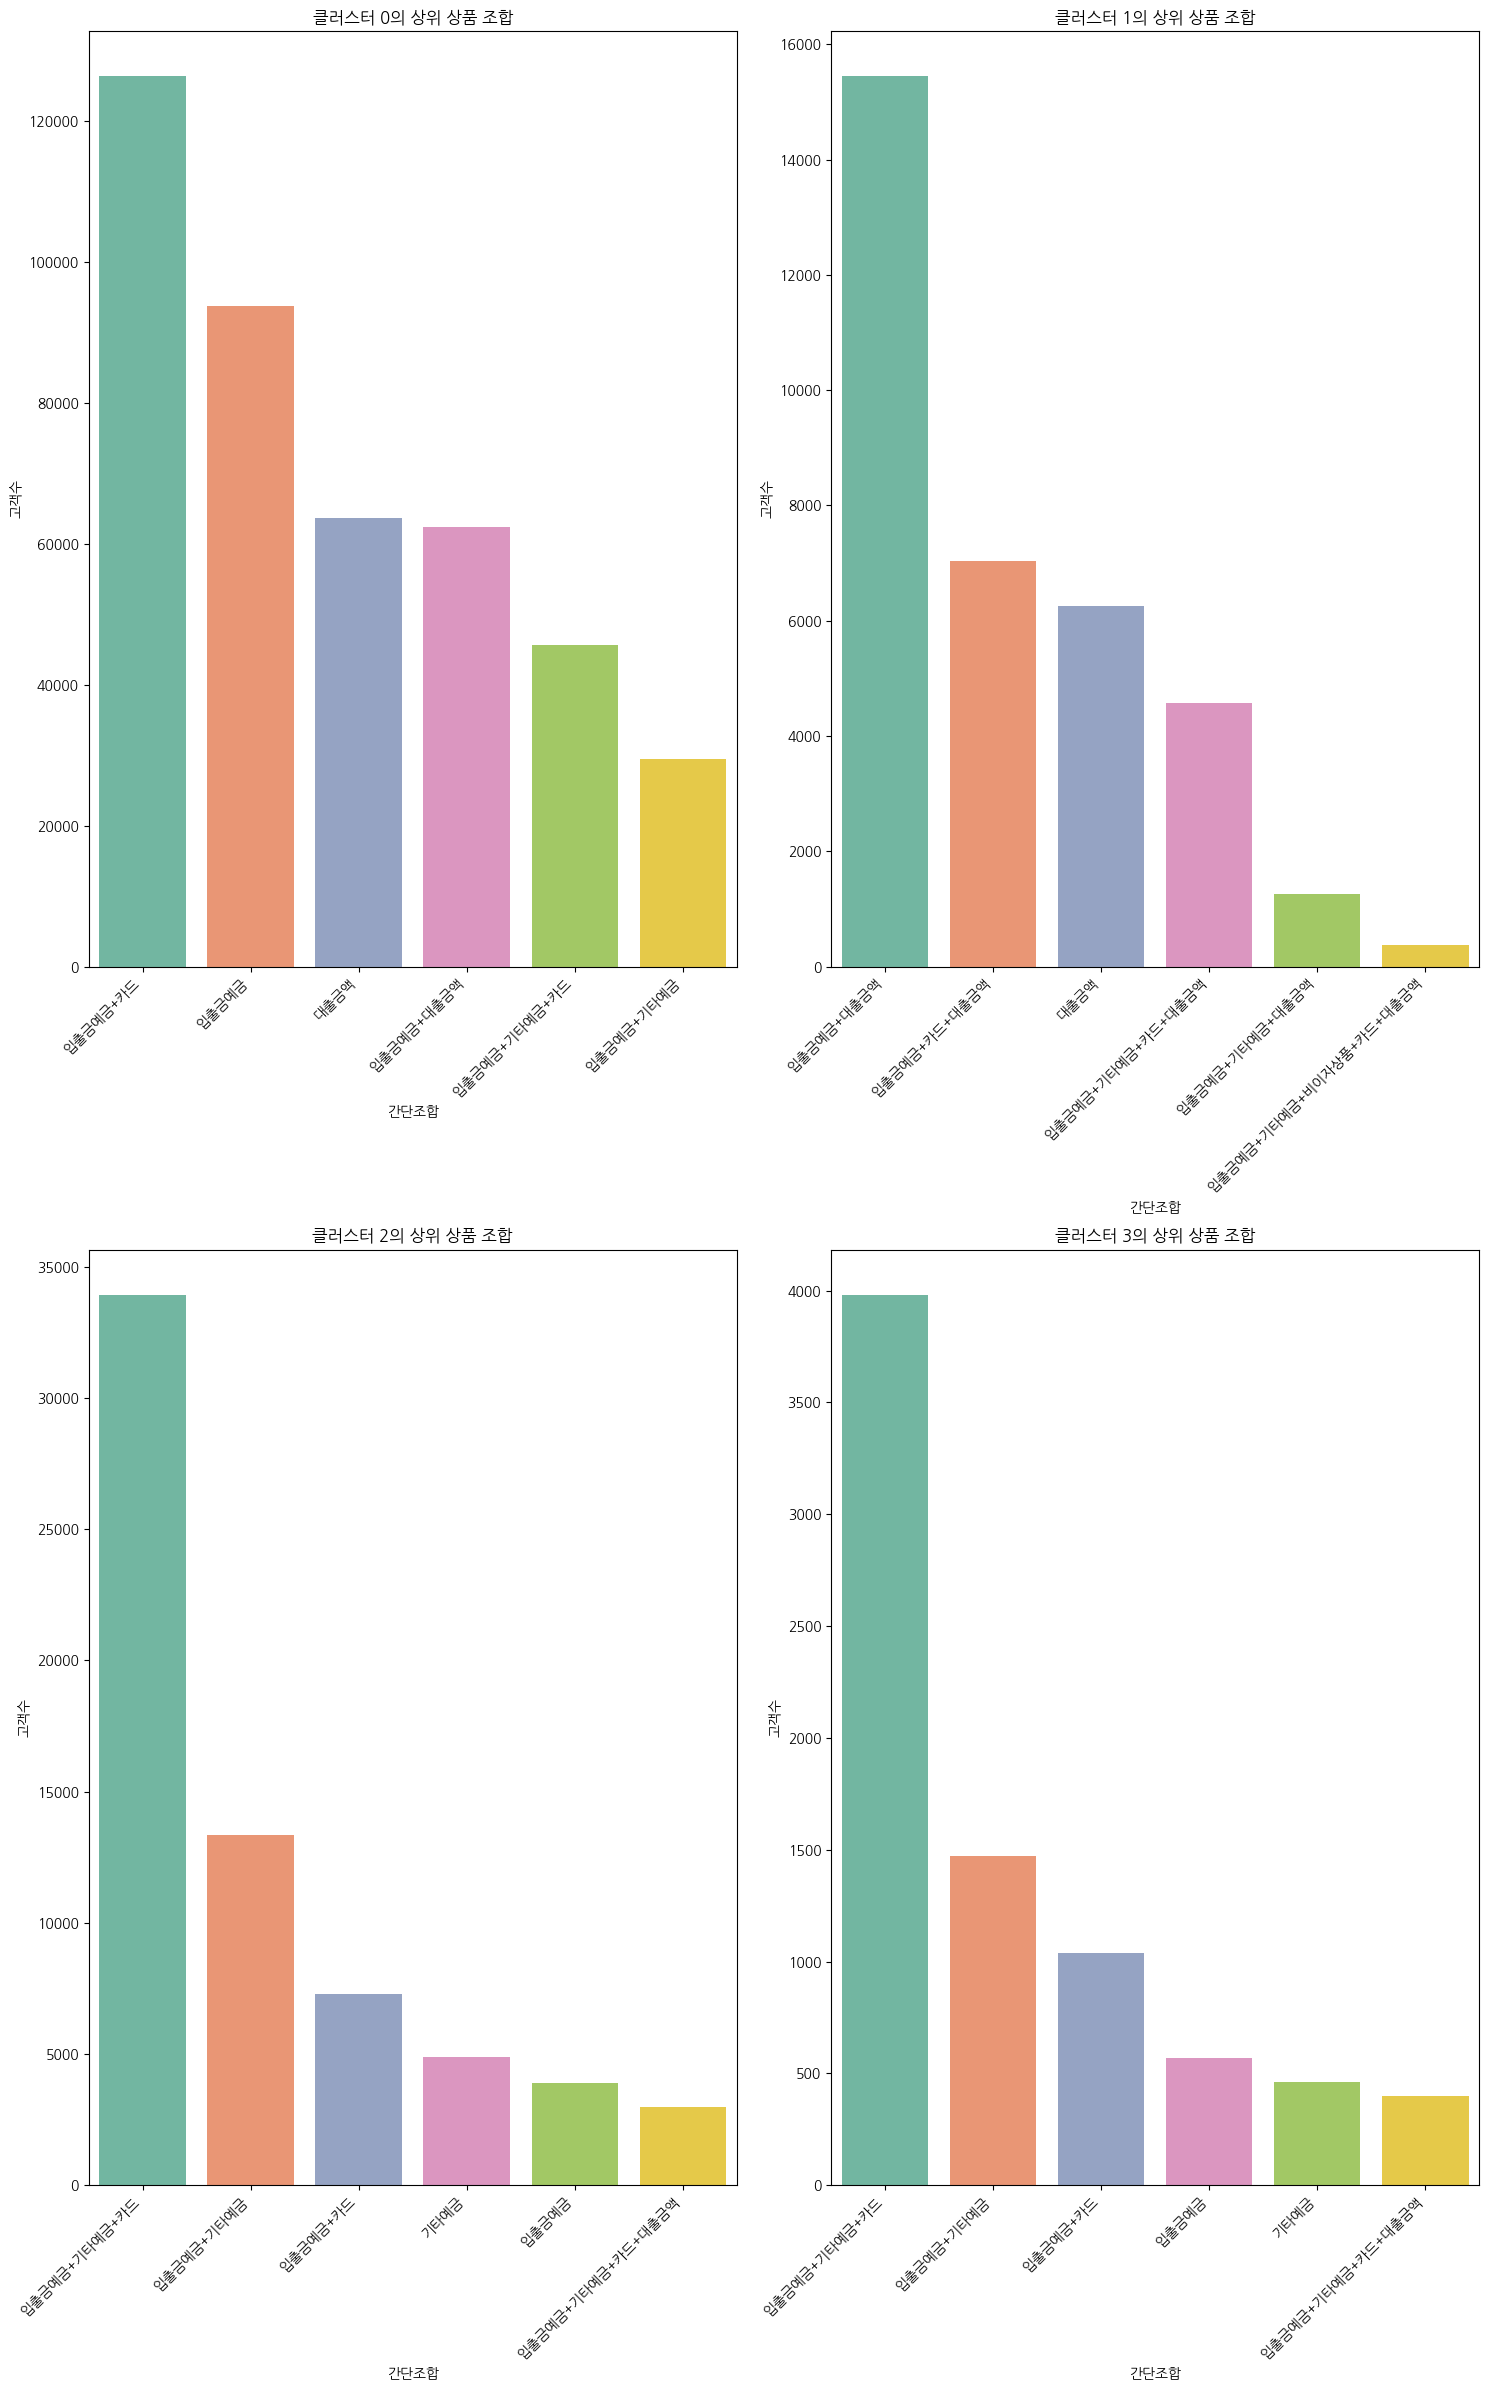

In [37]:
# 시각화
# 3x3 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(15, 24))  # 2x2 배치, 크기 조정
clusters = [top_combos_0, top_combos_1, top_combos_2, 
            top_combos_3]

titles = [f"클러스터 {i}의 상위 상품 조합" for i in range(9)]

for i, (df, ax, title) in enumerate(zip(clusters, axes.flatten(), titles)):
    # polars → pandas 변환
    top_combos_pd = df.select(["간단조합", "고객수"]).to_pandas()

    # Seaborn 막대 그래프
    sns.barplot(data=top_combos_pd, x="간단조합", y="고객수", palette="Set2", ax=ax)

    # 제목 및 설정
    ax.set_title(title, fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

### 1. 클러스터별 조합별 고객 수 pivot table → Heatmap

In [38]:
# 각 데이터프레임에 클러스터 번호 컬럼 추가
# 클러스터별 데이터프레임을 리스트로 저장
combo_summary_clusters = [combo_summary_cluster_a, combo_summary_cluster_b, combo_summary_cluster_c, 
                          combo_summary_cluster_d]

# 클러스터 번호 컬럼 추가 및 리스트 생성
combo_dfs = []
for i, df in enumerate(combo_summary_clusters):
    df = df.with_columns([
        pl.lit(i).alias("클러스터"),  # 클러스터 번호 추가
        pl.col("상품조합").map_elements(simplify_combo).alias("간단조합")  # map_elements() 사용
    ])
    combo_dfs.append(df.select(["클러스터", "간단조합", "고객수"]))  # 필요한 컬럼 선택

In [39]:
combo_dfs[0].head(6)

클러스터,간단조합,고객수
i32,str,u32
0,"""입출금예금+카드""",126343
0,"""입출금예금""",93658
0,"""대출금액""",63599
0,"""입출금예금+대출금액""",62333
0,"""입출금예금+기타예금+카드""",45650
0,"""입출금예금+기타예금""",29383


In [40]:
combo_dfs[1].head(6)

클러스터,간단조합,고객수
i32,str,u32
1,"""입출금예금+대출금액""",15454
1,"""입출금예금+카드+대출금액""",7032
1,"""대출금액""",6257
1,"""입출금예금+기타예금+카드+대출금액""",4567
1,"""입출금예금+기타예금+대출금액""",1266
1,"""입출금예금+기타예금+비이자상품+카드+대출금액""",375


In [41]:
# 하나의 데이터프레임으로 병합
combo_all = pl.concat(combo_dfs)

# pandas로 변환 후 피벗 테이블 생성
combo_all_pd = combo_all.to_pandas()
pivot = combo_all_pd.pivot_table(index="간단조합", columns="클러스터", values="고객수", fill_value=0)

In [42]:
pivot

클러스터,0,1,2,3
간단조합,,,,
기타예금,19238.0,0.0,4887.0,462.0
기타예금+대출금액,390.0,89.0,64.0,3.0
기타예금+비이자상품,72.0,0.0,42.0,1.0
기타예금+비이자상품+대출금액,1.0,3.0,0.0,0.0
기타예금+비이자상품+카드,15.0,0.0,1.0,0.0
기타예금+비이자상품+카드+대출금액,0.0,6.0,0.0,0.0
기타예금+카드,1219.0,0.0,248.0,11.0
기타예금+카드+대출금액,77.0,79.0,16.0,1.0
대출금액,63599.0,6257.0,0.0,0.0


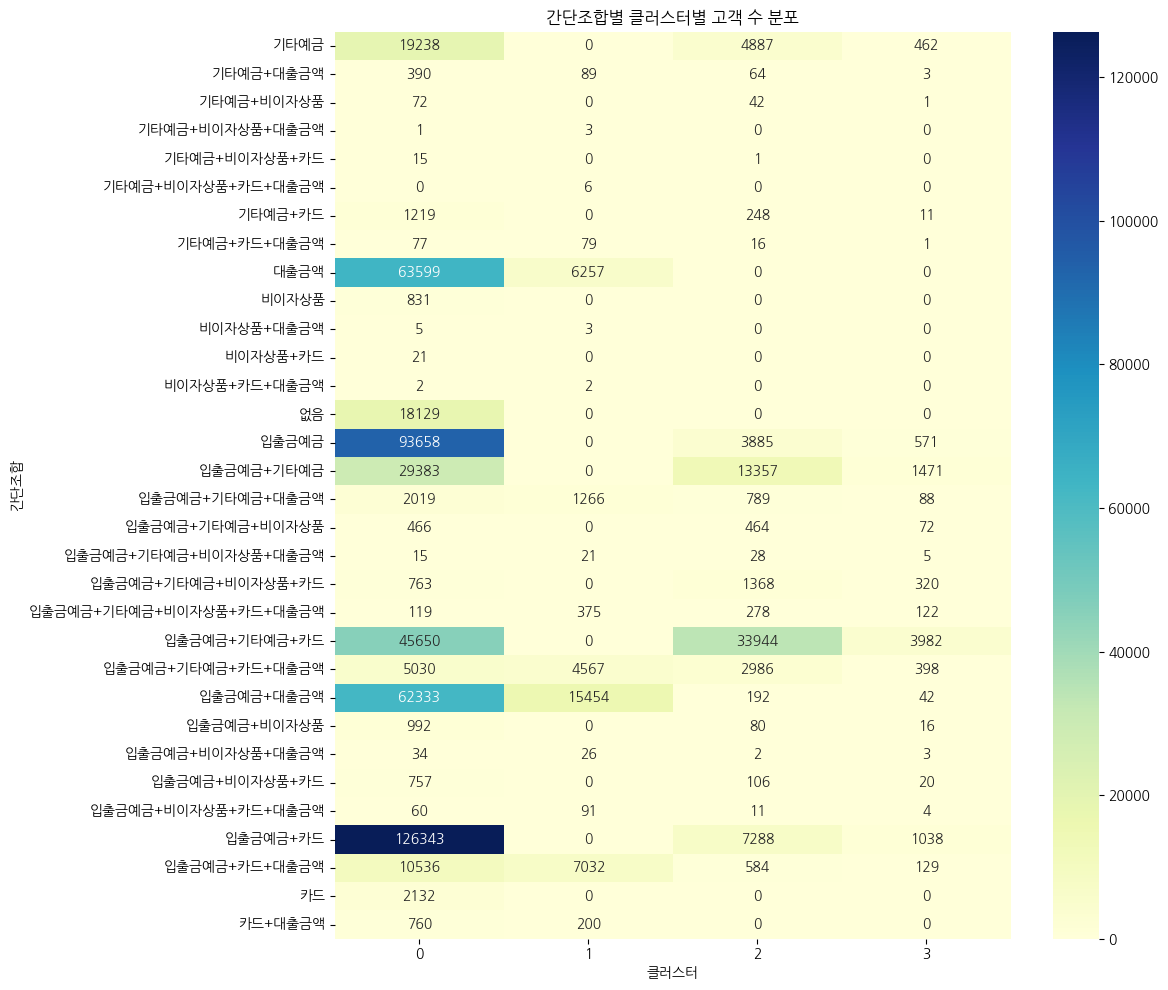

In [43]:
# Heatmap 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt="g")
plt.title("간단조합별 클러스터별 고객 수 분포")
plt.xlabel("클러스터")
plt.ylabel("간단조합")
plt.tight_layout()
plt.show()

### 2. 클러스터별 각 조합 비중 비교 (비율 기반)

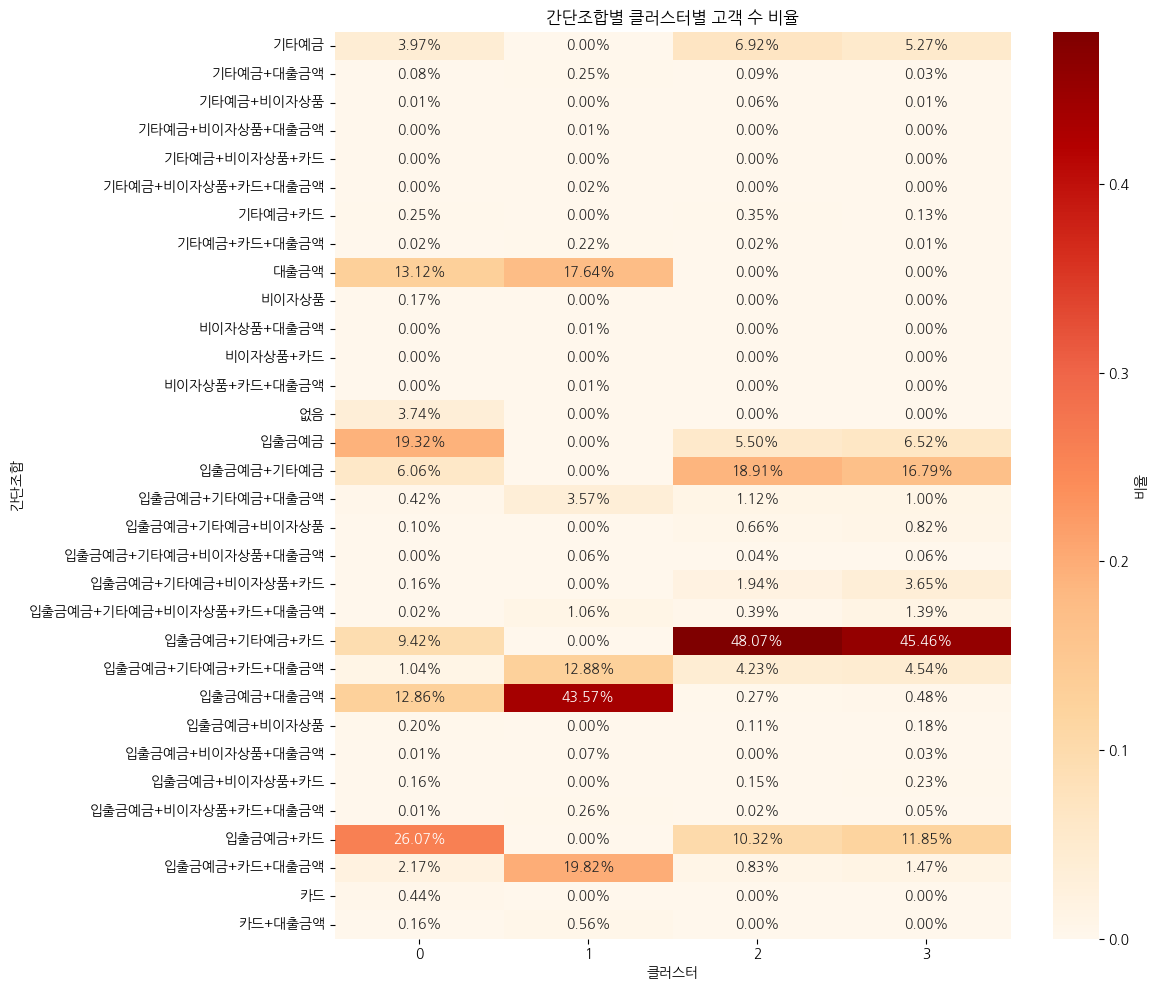

In [44]:
# 각 클러스터별로 전체 고객 수로 나눠서 비율 계산
pivot_ratio = pivot.divide(pivot.sum(axis=0), axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_ratio, cmap="OrRd", annot=True, fmt=".2%", cbar_kws={"label": "비율"})
plt.title("간단조합별 클러스터별 고객 수 비율")
plt.xlabel("클러스터")
plt.ylabel("간단조합")
plt.tight_layout()
plt.show()

In [45]:
pivot_ratio

클러스터,0,1,2,3
간단조합,,,,
기타예금,0.039695,0.000000,0.069201,0.052746
기타예금+대출금액,0.000805,0.002509,0.000906,0.000343
기타예금+비이자상품,0.000149,0.000000,0.000595,0.000114
기타예금+비이자상품+대출금액,0.000002,0.000085,0.000000,0.000000
기타예금+비이자상품+카드,0.000031,0.000000,0.000014,0.000000
기타예금+비이자상품+카드+대출금액,0.000000,0.000169,0.000000,0.000000
기타예금+카드,0.002515,0.000000,0.003512,0.001256
기타예금+카드+대출금액,0.000159,0.002227,0.000227,0.000114
대출금액,0.131227,0.176398,0.000000,0.000000


In [46]:
# 해석 예시
# 클러스터 2에서 '요구불예금+거치식예금+적립식예금+카드' 조합이 고객의 55.38% 차지

In [47]:
# 인덱스를 컬럼으로 변환
pivot_ratio = pivot_ratio.reset_index()
# '간단조합'을 제외한 나머지 클러스터 컬럼에서 최대값 계산
pivot_ratio["최대값"] = pivot_ratio.drop(columns=["간단조합"]).max(axis=1)
# 최대값 기준 내림차순 정렬 후 "최대값" 컬럼 제거
pivot_ratio_sorted = pivot_ratio.sort_values(by="최대값", ascending=False).drop(columns=["최대값"])

In [48]:
pivot_ratio_sorted.head(10)

클러스터,간단조합,0,1,2,3
21,입출금예금+기타예금+카드,0.094192,0.000000,0.480657,0.454618
23,입출금예금+대출금액,0.128615,0.435680,0.002719,0.004795
28,입출금예금+카드,0.260690,0.000000,0.103200,0.118507
29,입출금예금+카드+대출금액,0.021739,0.198246,0.008270,0.014728
14,입출금예금,0.193249,0.000000,0.055013,0.065190
15,입출금예금+기타예금,0.060627,0.000000,0.189139,0.167942
8,대출금액,0.131227,0.176398,0.000000,0.000000
22,입출금예금+기타예금+카드+대출금액,0.010379,0.128753,0.042283,0.045439
0,기타예금,0.039695,0.000000,0.069201,0.052746
13,없음,0.037406,0.000000,0.000000,0.000000


### 3. 특정 조합 기준으로 클러스터 특이성 확인

In [49]:
# pivot.loc["요구불+대출"].sort_values(ascending=False).plot(kind="bar")
# plt.title("요구불+대출 조합의 클러스터별 분포")
# plt.ylabel("고객 수")
# plt.xlabel("클러스터")
# plt.show()